In [8]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from finta import TA
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import yahoo_finance as yfi

from datetime import datetime

sns.set(rc={'figure.figsize':(11.7,8.27)})

class stock():
    
    """"The name_methods_show() only show the indicator  they related to, 
    between start and end, whereas the name_methods() output a dataframe 
    containing the values on the entire dataset"""
    
    def __init__(self,name):
        self.stock_df_chart = pd.DataFrame(yf.Ticker(name).history(period="max"))
        self.stock_df_chart.columns = map(str.lower, self.stock_df_chart.columns)
        self.name = name
        
    def Bollinger_bands_show(self,start,end, width = False , upper = True, lower = True):

        """" The curve representing the actions tickers is a 7-days rolling average in order to make it smooooother"""
        
        self.stock_df_chart_chart.columns = map(str.lower, self.stock_df_chart_chart.columns)
        bbands = TA.BBANDS(self.stock_df_chart_chart)
        sns.set()
        if upper :
            bbands[start:end].BB_UPPER.plot()
        if lower :
            bbands[start:end].BB_LOWER.plot()
        

        self.stock_df_chart["open"][start:end].rolling(window=7, center =True).mean().plot(label="MA 7 jours",ls = ":")
        plt.show()
        if width :
            width = TA.BBWIDTH(self.stock_df_chart)
            width[start:end].plot(label="Width", lw =3)
            plt.show()
        
    def cours_show(self):
        #Plot the stock

        fig = go.Figure(data=go.Ohlc(x=self.stock_df_chart.index,
            open=self.stock_df_chart['open'],
            high=self.stock_df_chart['high'],
            low=self.stock_df_chart['low'],
            close=self.stock_df_chart['close']))
        fig.show()
        
    def EMA_show(self,start,end):
        #Exponential Moving Average
        TA.EMA(self.stock_df_chart)[start:end].plot()
        plt.show()
        
    def RSI_show(self,start,end):
        #Relative Strengh Indicator
        TA.RSI(self.stock_df_chart)[start:end].plot()
        plt.show()
        
    def ROC_show(self,start,end):
        #Rate of Change
        TA.ROC(self.stock_df_chart)[start:end].plot()
        plt.show()
        
    def BASP_show(self,start,end):
        #Rate of Change
        TA.BASP(self.stock_df_chart)[start:end].plot()
        plt.show()
        
    def MOM_show(self,start,end):
        #Rate of Change
        TA.ROC(self.stock_df_chart)[start:end]

        return()
    
    def EMA(self):
        #Exponential Moving Average
        return TA.EMA(self.stock_df_chart)
        
    def RSI(self):
        #Relative Strengh Indicator
        return TA.RSI(self.stock_df_chart)
        
    def ROC(self):
        #Rate of Change
        return TA.ROC(self.stock_df_chart)
        
    def MOM(self):
        #Momentum
        return TA.MOM(self.stock_df_chart)
    
    def Bollinger_bands(self):
        return TA.BBANDS(self.stock_df_chart)
    
    def Bollinger_width(self):
        return TA.BBWIDTH(self.stock_df_chart)
    
    def price(self, var="open"):
        return(self.stock_df_chart[var])
    
    def BASP(self):
        return TA.BASP(self.stock_df_chart)
    
     
        
        
        
        

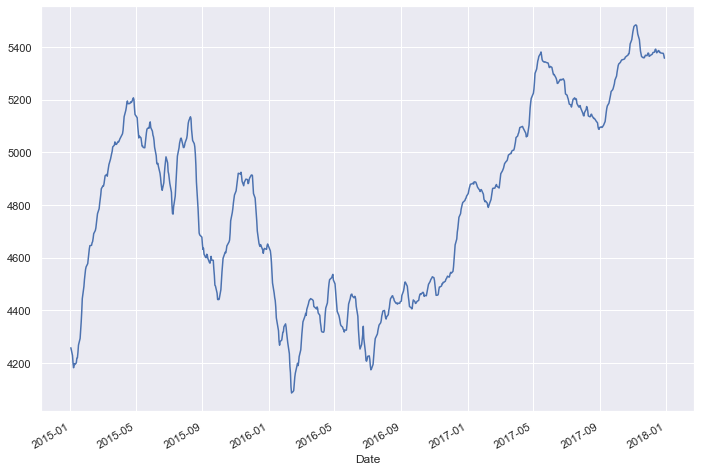

In [2]:
cac40 = stock(name="^FCHI")
cac40.EMA_show("2015","2017")

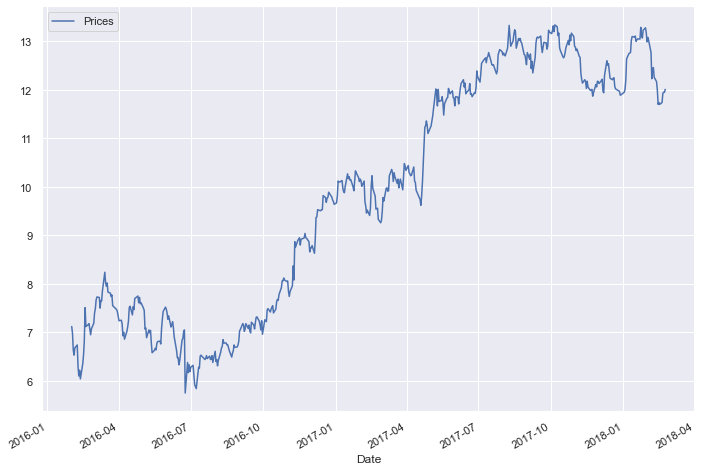

In [9]:
""" This cell is expected to construct the data_set we'll feed our model with"""

stock_ds = stock(name="ACA.PA")

"""Results are not evenly good. ACA.AP is pretty good whereas MSFT is catastrophic

What is left to improve is the choice of the estimator's hyperparamater
such as their quality, the lenght training dataset."""


"""The only indicators taken into account are, for now : 
Relative Strenght Indicator, 
Momentum of Market, 
Bollinger Bands width, 
Rate of Change, 
Prices (not of the forcasted period of course)"""

X = pd.DataFrame({"RSI" : stock_ds.RSI(), 
                  "MOM" : stock_ds.MOM(), 
                  "Bollinger Width" : stock_ds.Bollinger_width(), 
                  "ROC" : stock_ds.ROC(),
                 "Prices" : stock_ds.price()})

y = pd.DataFrame({"Prices" : stock_ds.price()})

X,y = X.dropna(), y.dropna()


assert len(X)!=0, "X dataset is empty bordel"
assert len(y)!= 0, "y dataset is empty bordel"

""""The segmentation of the train/test datasets are arbitrary. 
The forecasting period is expected to be Month+1
We expect to encounter some size issues as markets are not open 365/365 days 
and the closing days are not excatly the same every year"""

X_train = X["2014-01":"2016-01"]
y_train = y["2016-02":"2018-02-25"]


y_train.plot()
plt.show()


/Users/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


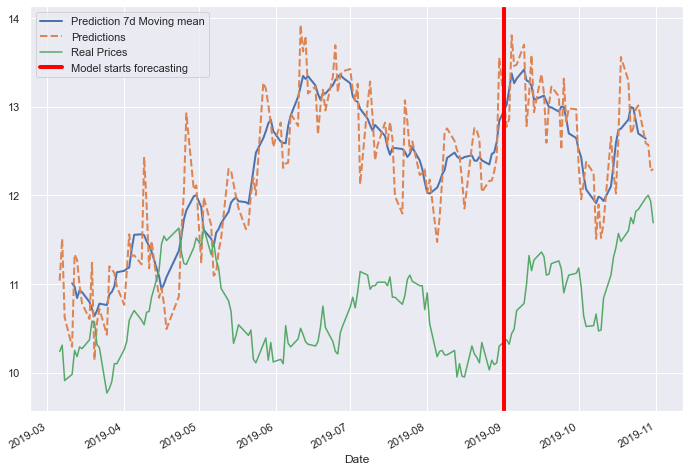

In [10]:
"""def date_comparison(d1, d2):
    n = min(len(d1),len(d2))
    if n <5 : d1_l = [int(d1[:4]), int], d2_l = [int(d1[:4]), int]
    """


X_test_start = "2019-02"
X_test_end = "2019-09"

assert X_test_start < X_test_start

X_test = X[X_test_start:X_end]
y_test = y["2019-03-06":"2019-10"]

"""" Below stands a way of dealing with the size issue of training datasets.
It's a degree 0 way of dealing with it. There are certainly more efficient 
ways to handle it"""

if len(y_train)-len(X_train)>0 : y_train= y_train[:-abs(len(y_train)-len(X_train))]
if len(y_train)-len(X_train)<0 : X_train= X_train[:-abs(len(y_train)-len(X_train))]
    

    
"""" The ML model chosen here is SVR because of the architecture of the output.
Chosing a linear Kernel is arbitrary, could be improved"""

from sklearn.svm import SVR
from sklearn import linear_model


def model_inator(model_type="SVR linear"):
    if model_type == "SVR linear" :
        
        return(SVR(kernel="linear"))
        
    elif model_type == "SVR rbf" :
       return(SVR(kernel="rbf"))

    elif model_type == "ridge" :
       return(linear_model.Ridge(alpha=.5))

    elif model_type == "lasso" :
       return(linear_model.Lasso(alpha=.1))

    
    
    
model = model_inator("SVR linear")
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)



""""We have to equalize the size of the test datasets"""

if len(y_test)-len(y_pred)>0 : 
    y_test= y_test[:-abs(len(y_test)-len(y_pred))]
    if len(y_test)-len(y_pred)!=0 : raise ValueError("L'ajustement ne fonctionne pas, y_test est trop long")
if len(y_test)-len(y_pred)<0 : 
    y_pred= y_pred[:-abs(len(y_test)-len(y_pred))]
    if len(y_test)-len(y_pred)!=0 : raise ValueError("L'ajustement ne fonctionne pas, y_pred est trop long")

    
    
"""" Plotting the real prices and the predictions to have a visual assession of 
the quality of our model"""

y_test["Predictions"] = y_pred
y_test["Pred_mean"] = y_test["Predictions"].rolling(window=7, center =True).mean().plot(label="Prediction 7d Moving mean",lw = 2)
y_test["Predictions"].plot(label = "Predictions", ls = "--", lw = 2)
y_test["Prices"].plot(label="Real Prices")

plt.axvline(label = "Model starts forecasting" , x=X_end, ymin=0, ymax=190, lw = 4, color = "red")
plt.legend()
plt.show()

In [5]:
amzn = yf.Ticker("AMZN")
amzn.info

{'zip': '98109-5210',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 1298000,
 'longBusinessSummary': 'Amazon.com, Inc. engages in the retail sale of consumer products and subscriptions in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It sells merchandise and content purchased for resale from third-party sellers through physical and online stores. The company also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Rings, and Echo and other devices; provides Kindle Direct Publishing, an online service that allows independent authors and publishers to make their books available in the Kindle Store; and develops and produces media content. In addition, it offers programs that enable sellers to sell their products on its websites, as well as its stores; and programs that allow authors, musicians, filmmakers, skill and app developers, and others to publish 

In [6]:
from finpie import Fundamentals

fd = Fundamentals('AAPL', freq = 'q')
fd.ratios()

,current_ratio,longterm_debt_to_capital,debt_to_equity_ratio,gross_margin,operating_margin,ebit_margin,ebitda_margin,pretax_profit_margin,net_profit_margin,asset_turnover,inventory_turnover_ratio,receiveable_turnover,days_sales_in_receivables,roe__return_on_equity,return_on_tangible_equity,roa__return_on_assets,roi__return_on_investment,book_value_per_share,operating_cash_flow_per_share,free_cash_flow_per_share
date,,,,,,,,,,,,,,,,,,,,
2005-03-31,2.6871,NaN,NaN,29.8489,12.3959,12.3959,NaN,13.4135,8.9423,0.3207,13.8720,3.6520,24.6439,4.5412,4.6230,2.8682,4.5412,0.2771,0.0546,0.0504
2005-06-30,3.0022,NaN,NaN,29.6591,12.1023,12.1023,NaN,13.4091,9.0625,0.3356,12.8290,4.2563,21.1449,4.6767,4.7527,3.0416,4.6767,0.2942,0.0194,0.0168
2005-09-30,2.9538,NaN,NaN,28.1131,11.2017,11.2017,NaN,12.8331,11.5280,0.3194,16.0242,4.1095,21.9005,5.7081,5.7829,3.6818,5.7081,0.3177,0.0317,0.0276
2005-12-31,2.4036,NaN,NaN,27.2047,13.0458,13.0458,NaN,14.4547,9.8278,0.4054,17.1516,4.3193,20.8367,6.7422,6.8179,3.9842,6.7422,0.3539,0.0116,0.0082
2006-03-31,2.5328,NaN,NaN,29.7545,12.1358,12.1358,NaN,13.8793,9.4058,0.3133,15.0098,5.0627,17.7770,4.7224,4.7830,2.9473,4.7224,0.3651,0.0052,0.0130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,1.5978,0.5097,1.2095,38.3548,27.8472,27.8472,NaN,28.2273,24.2172,0.2696,13.8155,2.2986,39.1546,24.8361,24.8361,6.5281,12.1768,5.1044,1.7126,1.5944
2020-03-31,1.4960,0.5318,1.3963,38.3619,22.0414,22.0414,NaN,22.5250,19.2907,0.1820,10.7807,1.9009,47.3467,14.3436,14.3436,3.5109,6.7154,4.5343,0.7749,0.6684
2020-06-30,1.4695,0.5654,1.5595,37.9995,21.9335,21.9335,NaN,22.0106,18.8540,0.1881,9.3024,1.8608,48.3664,15.5682,15.5682,3.5460,6.7655,4.2182,0.9626,0.8701
